# Lab 10 - Clustering

We are exploring partitional clustering and hierarchical clustering in this lab using sci-kit learn. Let's import the
 necessary libraries.

In [1]:
import pandas as pd

from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

Let's take iris dataset for this exercise. Clustering is an unsupervised learning algorithm. Since Iris dataset comes
with labels, to use it for clustering we need to remove the labels for this exercise.

In [2]:
iris_data = datasets.load_iris()

X = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X.shape

(150, 4)

Let's normalize the data.

In [4]:
scaler =  MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


## K-means clustering
Let's use the k-means clustering algorithm in sklearn to cluster these data instances into 3 clusters. You can find
the documentation of sklearn k-means algorithm implementation
[here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

Let's try to visualise how the algorithm clustered the data. First we have to add the assigned clusters to the
dataframe.

In [6]:
X_with_labels = X.copy(deep=True)

X_with_labels['clusters'] = kmeans.labels_
X_with_labels.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


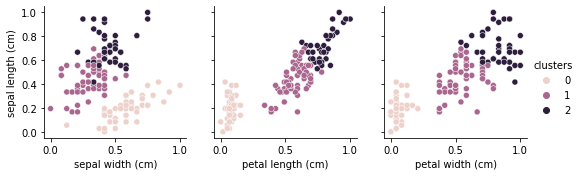

In [7]:
g = sns.PairGrid(X_with_labels, y_vars=["sepal length (cm)"], x_vars=["sepal width (cm)", "petal length (cm)", "petal width "
                                                                                                       "(cm)"], hue='clusters')
g.map(sns.scatterplot)
g.add_legend()

Let's load the actual labels and see how close they are to the clusters identified by the kmeans algorithm.

In [8]:
X_with_labels['target'] = iris_data.target
X_with_labels.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters,target
0,0.222222,0.625000,0.067797,0.041667,0,0
1,0.166667,0.416667,0.067797,0.041667,0,0
2,0.111111,0.500000,0.050847,0.041667,0,0
3,0.083333,0.458333,0.084746,0.041667,0,0
4,0.194444,0.666667,0.067797,0.041667,0,0


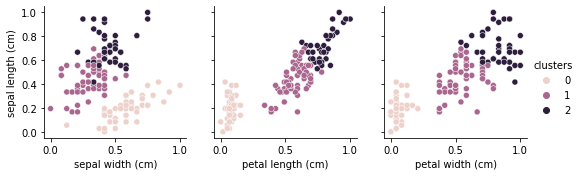

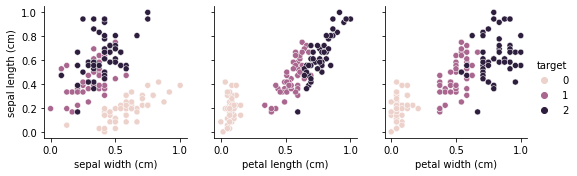

In [9]:
g = sns.PairGrid(X_with_labels, y_vars=["sepal length (cm)"], x_vars=["sepal width (cm)", "petal length (cm)", "petal width "
                                                                                                       "(cm)"
                                                                                                  ""], hue='clusters')
g.map(sns.scatterplot)
g.add_legend()

g_t = sns.PairGrid(X_with_labels, y_vars=["sepal length (cm)"], x_vars=["sepal width (cm)", "petal length (cm)", "petal width "
                                                                                                       "(cm)"
                                                                                                  ""], hue='target')
g_t.map(sns.scatterplot)
g_t.add_legend()

Using only 3 plots might not give us the best representation. However, we can see that the clustering algorithm has
done a relatively good job on identifying correct groups, specially group 0.

Let's get a numerical value to represent the performance of our clustering algorithm for this dataset using
Silhouette score.

In [10]:
score = silhouette_score(X, X_with_labels['clusters'])

print("Silhouette score for k-means: "+str(score))


Silhouette score for k-means: 0.5047687565398589


### Task:
1. Plot a line graph of to demonstrate the variation of silhouette scores with the number of clusters (K=1,2,..,10)
using k-means clustering algorithm.
2. Find the best set of hyperparameters to use in the k-means clustering algorithm for this dataset.

## Hierarchical clustering

let's try to cluster the same dataset using the hierarchical clustering methods. Scipy has an implementation of
agglomerative clustering we can use. You can find the hierarchical clustering implementations of Scipy
[here](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html).

Let's apply agglomerative clustering algorithm to our dataset and plot the dendrogram.

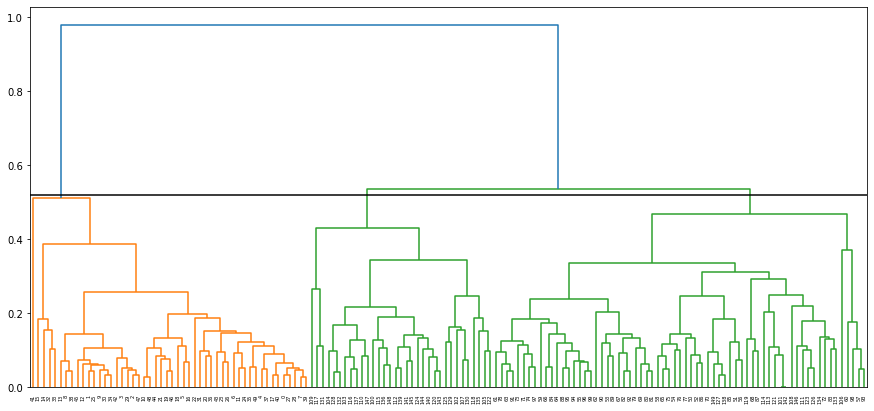

In [11]:
cluster_data = hierarchy.linkage(X, "average")
fig = plt.figure(figsize=(15,7))
dend = hierarchy.dendrogram(cluster_data, leaf_rotation=90)

plt.axhline(y = 0.52, c='k')

Let's cut the dendrogram at y=0.52 and get three clusters.

In [12]:
cut = hierarchy.fcluster(cluster_data, 0.52, criterion="distance")

Let's plot our clusters with the original labels to see how close the clusters are.

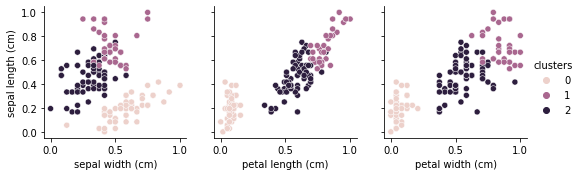

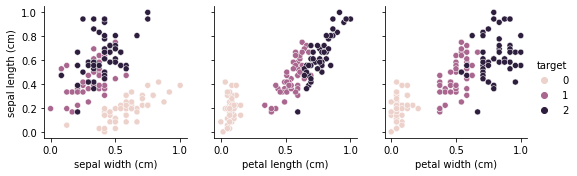

In [13]:
X_with_labels['clusters'] = cut-1

g = sns.PairGrid(X_with_labels, y_vars=["sepal length (cm)"], x_vars=["sepal width (cm)", "petal length (cm)", "petal width "
                                                                                                       "(cm)"
                                                                                                  ""], hue='clusters')
g.map(sns.scatterplot)
g.add_legend()

g_t = sns.PairGrid(X_with_labels, y_vars=["sepal length (cm)"], x_vars=["sepal width (cm)", "petal length (cm)", "petal width "
                                                                                                       "(cm)"
                                                                                                  ""], hue='target')
g_t.map(sns.scatterplot)
g_t.add_legend()

Although the ids of classes and clusters do not match, you can see that our algorithm has identified the clusters
approximately. Let's measure the Silhouette score.

In [14]:
score = silhouette_score(X, X_with_labels['clusters'])

print("Silhouette score for hierarchical: "+str(score))

Silhouette score for hierarchical: 0.5047999262278894


### Task:
1. Generate different dendrograms with 'single' and 'complete' linkage methods.
2. Explore how the difference of linkage method affect the validity of the clusters it generates.
3. Using the actual labels from iris dataset, calculate the accuracy and f1_scores for all the linkage methods.


## Example: Colour compression using k-means clustering

An interesting application of clustering is that it can be used for color compression of images. An image with 24bit
color space have 16 million colours. In most images however, a large number of colors are unused, because many pixels use
the same colors (eg: Sky).

Let's load an example image, normalize and reshape it to a 2D array.

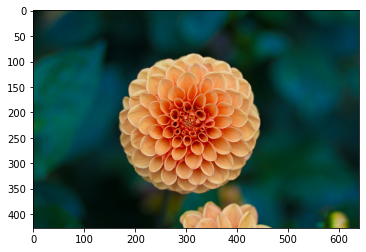

In [15]:
image = datasets.load_sample_image("flower.jpg")
ax = plt.axes()
ax.imshow(image)

In [16]:
image.shape

(427, 640, 3)

In [17]:
image_data = image/255.0
image_data = image_data.reshape(427*640, 3)
image_data.shape

(273280, 3)

Let's plot and see what are the colors used in our image, out of 16 million colors.

<ipython-input-18-4ed232ddeb94>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


[Text(0.5, 0, 'Red'), Text(0.5, 0, 'Green'), Text(0.5, 0, 'Blue')]

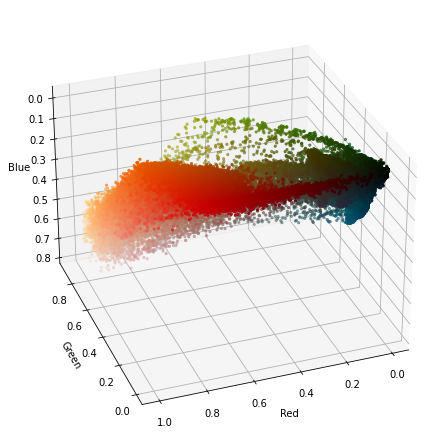

In [18]:
R, G, B = image_data.T

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(R, G, B, color=image_data, marker='.')
ax.set(xlabel='Red', ylabel='Green', zlabel='Blue')

Let's reduce the 16 million colours to just 16 colours, using k-means clustering across the pixel space.

In [19]:
colour_compress = KMeans(16)
colour_compress.fit(image_data)

new_colours = colour_compress.cluster_centers_[colour_compress.predict(image_data)]
new_colours.shape

(273280, 3)

Let's plot and see the reduced color space as well.

<ipython-input-20-5ce2529e7158>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


[Text(0.5, 0, 'Red'), Text(0.5, 0, 'Green'), Text(0.5, 0, 'Blue')]

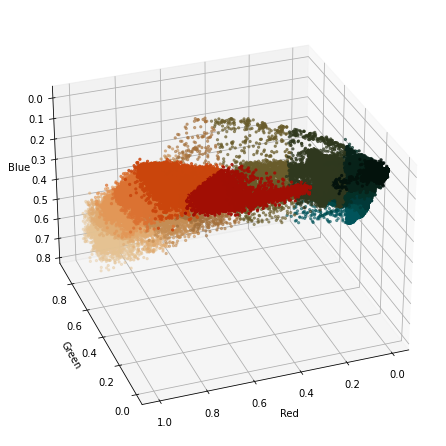

In [20]:
R, G, B = image_data.T

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(R, G, B, color=new_colours, marker='.')
ax.set(xlabel='Red', ylabel='Green', zlabel='Blue')

You can see the color mapping of new colors to the old colors if you compare the above two plots.

Let's plot the compressed image.

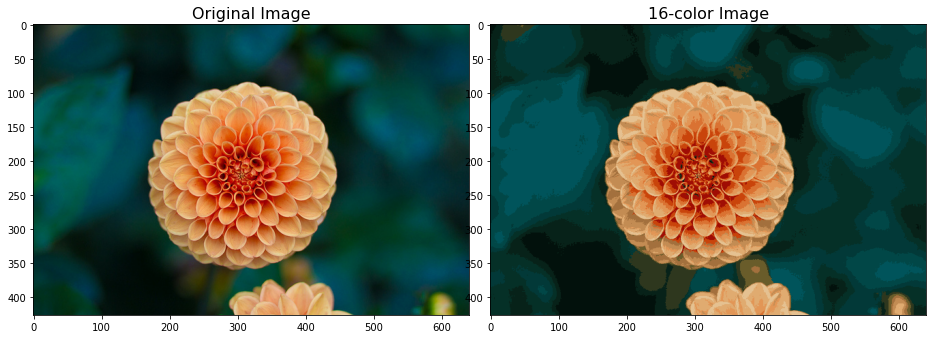

In [21]:
image_recoloured = new_colours.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(image_recoloured)
ax[1].set_title('16-color Image', size=16);

Although you can see that some colour information is missing, specially in gradients, in the compressed image. However,
you compress the original image which used 427\*640\*24 = 6558720 bits to 427\*640\*4 = 1093120 bits (data compression
ratio = 6.0). Even we have saved 5465600 bits of memory you can clearly see and identify the features of the flower without
  any issue.